In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 1.9.1  Device: cpu


In [5]:
batch_size = 32

train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=transforms.ToTensor())

validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


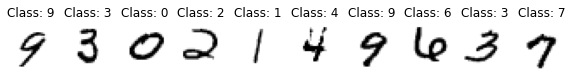

In [7]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28), cmap="gray_r")
    plt.title('Class: '+str(y_train[i].item()))

In [8]:
class Net(nn.Module):
    def __init__(self, Net):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 50)
        self.fc1_drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(50, 50)
        self.fc2_drop = nn.Dropout(0.2)
        self.fc3 = nn.Linear(50, 50)
        self.fc3_drop = nn.Dropout(0.2)
        self.fc4 = nn.Linear(50, 50)
        self.fc4_drop = nn.Dropout(0.2)
        self.fc5 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc2_drop(x)
        x = F.relu(self.fc3(x))
        x = self.fc3_drop(x)
        x = F.relu(self.fc4(x))
        x = self.fc4_drop(x)
        return F.log_softmax(self.fc5(x), dim=1)

model = Net(Net).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()



print(model)

model.fc1.weight

model.fc1.weight.size()

Net(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc2_drop): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=50, out_features=50, bias=True)
  (fc3_drop): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=50, out_features=50, bias=True)
  (fc4_drop): Dropout(p=0.2, inplace=False)
  (fc5): Linear(in_features=50, out_features=10, bias=True)
)


torch.Size([50, 784])

In [9]:
model.fc3.weight

Parameter containing:
tensor([[ 0.0584,  0.0014,  0.0943,  ..., -0.0109,  0.0863,  0.0553],
        [-0.0459, -0.0720,  0.1261,  ..., -0.0339, -0.0722,  0.0471],
        [ 0.0855,  0.0432, -0.0409,  ...,  0.0389, -0.1095, -0.0933],
        ...,
        [ 0.0024, -0.0747, -0.0078,  ...,  0.0906, -0.0174,  0.1373],
        [ 0.1030, -0.1299, -0.0027,  ...,  0.1101,  0.0661,  0.0442],
        [ 0.1278, -0.0672, -0.0647,  ...,  0.1018,  0.0829, -0.0989]],
       requires_grad=True)

In [10]:
model.fc3.weight.size()

torch.Size([50, 50])

In [11]:
model.fc1.weight

Parameter containing:
tensor([[ 0.0349, -0.0294,  0.0270,  ...,  0.0211, -0.0113,  0.0100],
        [ 0.0230,  0.0346,  0.0006,  ..., -0.0300, -0.0025, -0.0240],
        [ 0.0353,  0.0303, -0.0055,  ..., -0.0158,  0.0199,  0.0016],
        ...,
        [ 0.0109, -0.0212,  0.0062,  ..., -0.0096, -0.0263,  0.0157],
        [ 0.0228,  0.0040,  0.0327,  ...,  0.0143, -0.0126,  0.0213],
        [-0.0165,  0.0011, -0.0155,  ..., -0.0082, -0.0025, -0.0165]],
       requires_grad=True)

In [12]:
model.fc2.weight

Parameter containing:
tensor([[ 0.0470, -0.0461, -0.0431,  ...,  0.1168,  0.0541,  0.1002],
        [ 0.0733, -0.0984,  0.0675,  ...,  0.1172, -0.0131, -0.0685],
        [ 0.0556,  0.0902,  0.0211,  ..., -0.0379,  0.0555, -0.1101],
        ...,
        [-0.0592, -0.1368, -0.1186,  ...,  0.0032,  0.0745, -0.0906],
        [ 0.0982,  0.0673,  0.0709,  ..., -0.0569, -0.1065,  0.0251],
        [ 0.1401, -0.1190,  0.0166,  ...,  0.0764,  0.0777,  0.0952]],
       requires_grad=True)

In [13]:
model.fc4.weight

Parameter containing:
tensor([[-0.0600,  0.0131, -0.0966,  ...,  0.0281,  0.0209, -0.0095],
        [ 0.1027, -0.0468,  0.0203,  ..., -0.0534,  0.1111, -0.1395],
        [-0.0767, -0.1173, -0.0317,  ..., -0.0370,  0.0207,  0.0800],
        ...,
        [-0.1246, -0.0612, -0.0361,  ..., -0.0295, -0.1329, -0.0722],
        [ 0.0978, -0.0848, -0.0385,  ..., -0.0004, -0.0093, -0.0783],
        [ 0.0602,  0.0678, -0.0726,  ..., -0.0699, -0.0620, -0.0749]],
       requires_grad=True)

In [14]:
model.fc5.weight

Parameter containing:
tensor([[ 0.0468,  0.0113,  0.0103,  0.0784, -0.0473, -0.0097, -0.0945, -0.1196,
         -0.0123,  0.0533, -0.0757, -0.1015, -0.0866, -0.1277,  0.0166,  0.0990,
          0.1063,  0.0224, -0.0902,  0.0212, -0.0894,  0.1218, -0.0410, -0.1250,
          0.0809, -0.1117, -0.0659,  0.0157, -0.0135,  0.0162,  0.1019, -0.0375,
         -0.0360, -0.0952, -0.0576, -0.0034,  0.0497, -0.0255,  0.0025,  0.0203,
         -0.0847,  0.1119, -0.0559,  0.0708,  0.1177, -0.1073, -0.1309,  0.0897,
         -0.1178,  0.0248],
        [-0.0143, -0.1139,  0.0353,  0.0769,  0.1340,  0.1046,  0.0357,  0.1197,
          0.0971, -0.0607,  0.0221,  0.0702, -0.0629,  0.0563,  0.0752, -0.0798,
         -0.0741,  0.1273,  0.0389,  0.1067,  0.0175, -0.1209, -0.0081, -0.0438,
         -0.1015, -0.0120, -0.0937,  0.0766,  0.1374,  0.1368,  0.1152,  0.0480,
         -0.0613, -0.1072,  0.0916,  0.0551,  0.1003, -0.1294,  0.0931,  0.1263,
         -0.0492, -0.0454, -0.0782,  0.0678,  0.1244, -0.01

In [15]:
model.fc1.weight.size()

torch.Size([50, 784])

In [16]:
model.fc2.weight.size()

torch.Size([50, 50])

In [17]:
model.fc4.weight.size()

torch.Size([50, 50])

In [18]:
model.fc5.weight.size()

torch.Size([10, 50])

In [19]:
def train(epoch, log_interval=200):
    # Set model to training mode
    model.train()
    
    # Loop over each batch from the training set
    for batch_idx, (data, target) in enumerate(train_loader):
        # Copy data to GPU if needed
        data = data.to(device)
        target = target.to(device)

        # Zero gradient buffers
        optimizer.zero_grad() 
        
        # Pass data through the network
        output = model(data)

        # Calculate loss
        loss = criterion(output, target)

        # Backpropagate
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

In [20]:
def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))

In [21]:
%%time
epochs = 10

lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.306665
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.301573
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.303864
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.295106
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.294404
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.244560
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.140845
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.057534
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.994382
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1.942226

Validation set: Average loss: 1.5927, Accuracy: 4820/10000 (48%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.576941
Train Epoch: 2 [6400/60000 (11%)]	Loss: 1.404255
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.345441
Train Epoch: 2 [19200/60000 (32%)]	Loss: 1.160642
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.123726
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.885419
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.042025
Train Epoch: 2 [44800/60000 (75%)]	Loss: 1.344625
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.73

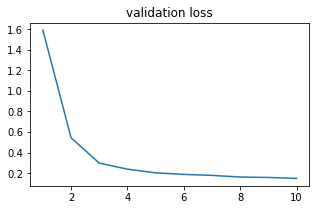

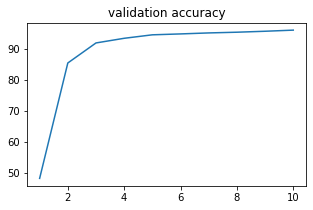

In [22]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('validation loss')

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('validation accuracy');

In [23]:
#class Net(nn.Module):
#    def __init__(self, Net):


#        for layer in Net.named_modules():
#            print(layer)

In [24]:
model.fc5.weight

Parameter containing:
tensor([[ 2.8105e-01, -3.7906e-02,  2.7748e-01,  1.5855e-01,  2.1649e-03,
         -1.7620e-01,  1.5567e-01, -1.0434e-01, -3.1926e-01,  2.6502e-01,
         -7.1107e-02, -4.9589e-01,  1.3341e-01, -1.3281e-01, -5.7497e-02,
          3.1825e-01,  3.1855e-01,  3.8258e-02, -1.0258e-01,  3.4549e-02,
          9.6535e-02,  1.2182e-01, -4.9490e-01, -5.4785e-01, -1.8050e-01,
         -3.2021e-01, -3.2334e-02,  1.5379e-02, -1.4431e-01,  2.3733e-01,
          2.4969e-01, -8.7807e-02,  1.2772e-01, -1.3552e-01, -1.4799e-01,
          1.3973e-01,  5.4057e-01,  2.8601e-01, -1.8905e-01,  2.0853e-01,
          3.4990e-05,  3.6780e-01, -2.5595e-01, -2.0330e-02,  4.1752e-01,
         -1.8082e-02, -5.7366e-01,  3.3370e-01, -7.1413e-01, -6.5762e-02],
        [-4.7088e-01, -3.5581e-01, -1.8931e-01, -2.8424e-01,  1.2925e-01,
          4.7145e-01,  5.8188e-03,  3.0628e-01,  4.2635e-01, -3.5765e-01,
          2.4258e-02,  4.6293e-01, -3.8529e-01,  6.0169e-02,  3.9208e-01,
         -5.231

In [25]:
model.fc1.weight


Parameter containing:
tensor([[ 0.0349, -0.0294,  0.0270,  ...,  0.0211, -0.0113,  0.0100],
        [ 0.0230,  0.0346,  0.0006,  ..., -0.0300, -0.0025, -0.0240],
        [ 0.0353,  0.0303, -0.0055,  ..., -0.0158,  0.0199,  0.0016],
        ...,
        [ 0.0109, -0.0212,  0.0062,  ..., -0.0096, -0.0263,  0.0157],
        [ 0.0228,  0.0040,  0.0327,  ...,  0.0143, -0.0126,  0.0213],
        [-0.0165,  0.0011, -0.0155,  ..., -0.0082, -0.0025, -0.0165]],
       requires_grad=True)

In [26]:

model.fc1.weight.size()

torch.Size([50, 784])

In [27]:
model.fc2.weight



Parameter containing:
tensor([[ 0.0206, -0.0559,  0.0236,  ...,  0.1230,  0.0151,  0.2391],
        [ 0.0850, -0.1188,  0.1156,  ...,  0.0142,  0.0137,  0.0612],
        [ 0.2093, -0.1250,  0.0737,  ...,  0.0138, -0.0174,  0.0607],
        ...,
        [-0.0852, -0.1523, -0.1537,  ...,  0.0969,  0.0744, -0.1056],
        [ 0.0023,  0.3771,  0.1167,  ..., -0.0300, -0.2168, -0.1135],
        [ 0.3753,  0.0869,  0.0400,  ...,  0.0910, -0.0418,  0.2144]],
       requires_grad=True)

In [28]:
model.fc3.weight


Parameter containing:
tensor([[-0.0891, -0.1436,  0.1826,  ..., -0.1204,  0.0622, -0.0202],
        [ 0.1552,  0.1152,  0.2123,  ..., -0.0590, -0.0314,  0.0845],
        [ 0.1300, -0.0182,  0.0050,  ...,  0.1450, -0.1891, -0.0030],
        ...,
        [-0.0971, -0.1553,  0.1382,  ...,  0.0203,  0.0453,  0.2840],
        [-0.0434, -0.2382, -0.0607,  ...,  0.1717,  0.1198,  0.1136],
        [ 0.1017, -0.0252, -0.2589,  ...,  0.2376,  0.1953, -0.1567]],
       requires_grad=True)

In [29]:
model.fc4.weight


Parameter containing:
tensor([[-0.1512, -0.0183, -0.0783,  ..., -0.2007,  0.1047,  0.2728],
        [ 0.0509, -0.0447, -0.1909,  ..., -0.0585,  0.0158, -0.1087],
        [-0.0505, -0.0414, -0.0559,  ..., -0.0429, -0.0878,  0.1150],
        ...,
        [-0.0814,  0.1317,  0.0651,  ..., -0.0305, -0.0095, -0.0159],
        [ 0.2137, -0.0419, -0.2042,  ...,  0.1085, -0.0325, -0.0013],
        [-0.0720,  0.0582, -0.1456,  ..., -0.3069, -0.1786,  0.0214]],
       requires_grad=True)

In [30]:
model.fc5.weight


Parameter containing:
tensor([[ 2.8105e-01, -3.7906e-02,  2.7748e-01,  1.5855e-01,  2.1649e-03,
         -1.7620e-01,  1.5567e-01, -1.0434e-01, -3.1926e-01,  2.6502e-01,
         -7.1107e-02, -4.9589e-01,  1.3341e-01, -1.3281e-01, -5.7497e-02,
          3.1825e-01,  3.1855e-01,  3.8258e-02, -1.0258e-01,  3.4549e-02,
          9.6535e-02,  1.2182e-01, -4.9490e-01, -5.4785e-01, -1.8050e-01,
         -3.2021e-01, -3.2334e-02,  1.5379e-02, -1.4431e-01,  2.3733e-01,
          2.4969e-01, -8.7807e-02,  1.2772e-01, -1.3552e-01, -1.4799e-01,
          1.3973e-01,  5.4057e-01,  2.8601e-01, -1.8905e-01,  2.0853e-01,
          3.4990e-05,  3.6780e-01, -2.5595e-01, -2.0330e-02,  4.1752e-01,
         -1.8082e-02, -5.7366e-01,  3.3370e-01, -7.1413e-01, -6.5762e-02],
        [-4.7088e-01, -3.5581e-01, -1.8931e-01, -2.8424e-01,  1.2925e-01,
          4.7145e-01,  5.8188e-03,  3.0628e-01,  4.2635e-01, -3.5765e-01,
          2.4258e-02,  4.6293e-01, -3.8529e-01,  6.0169e-02,  3.9208e-01,
         -5.231